In [60]:
from scipy import optimize
from numpy import linspace
import matplotlib.pyplot as plt

In [70]:
vlow = [0, 0]
vhigh = [1, 2]

def ibf(player, bid, params):
    params_player = params[player * 4: (player+1)*4]
    return  params_player[0] * bid**3 + params_player[1] * bid ** 2 + params_player[2] * bid + params_player[3]

def dibf(player, bid, params):
    params_player = params[player * 4: (player+1)*4]
    return  3 * params_player[0] * bid**2 + 2 * params_player[1] * bid + params_player[2] * bid

def model(x, params):
    player0 = (-ibf(1, x, params)/vhigh[1]) + \
        (ibf(0, x, params) - x) * (1 / vhigh[1]) * (dibf(1, x, params))

    player1 = (-ibf(0, x, params)/vhigh[0]) + \
        (ibf(1, x, params) - x) * (1 / vhigh[0]) * (dibf(0, x, params))
 
    high_bid_should_be_high_eval = 0
    for player in [0, 1]:
         high_bid_should_be_high_eval += abs(ibf(player, params[-1], params) - vhigh[player])
    
    zero_bid_should_be_zero_eval = 0
    for player in [0, 1]:
         zero_bid_should_be_zero_eval += abs(ibf(player, 0, params))
            
    return abs(player0) + abs(player1) + high_bid_should_be_high_eval + zero_bid_should_be_zero_eval

In [71]:
def loss_of_challenge(challenge):
    def bound(params):
        loss = 0
        for x in linspace(min(vlow), max(vhigh)):
            error = model(x, params)
            loss += abs(error)
        return loss
    return bound

In [72]:
def solve(challenge, bounds):
    results = dict()
    results['shgo'] = optimize.shgo(loss_of_challenge(challenge), bounds)
    return results['shgo']

In [73]:
bounds = [(-32, 32)] * 9
solution = solve(challenge_foc, bounds)

In [74]:
solution.x

array([-1.29088734e-07,  6.75462564e-07, -7.69889641e-07,  9.09824698e-08,
       -5.35715726e-07,  3.66765423e-06, -4.84635399e-06,  7.57044421e-07,
       -1.27838647e-03])

In [75]:
xs = linspace(min(vlow), max(vhigh))
ys = [
    [ibf(player, x, solution.x) for x in xs]
    for player in [0, 1]
]

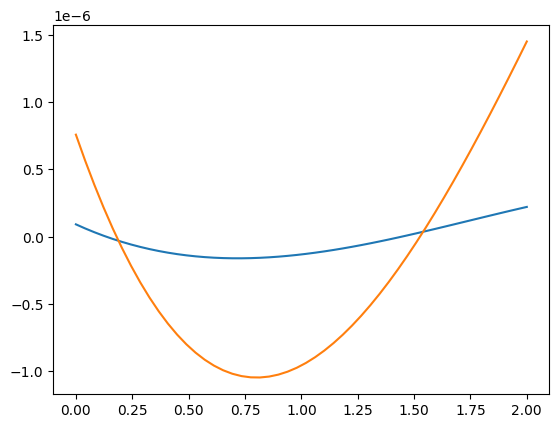

In [76]:
plt.plot(xs, ys[0])
plt.plot(xs, ys[1])